In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import pingouin as pg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
# Load dataset
df = sns.load_dataset('titanic')

In [ ]:
df.head()

In [4]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
#print(df.sex.unique())
#print(df.embarked.unique())
#print(df['class'].unique())
#print(df.who.unique())
print(df.adult_male.unique())
print(df.deck.unique())
print(df.embark_town.unique())
print(df.alive.unique())
print(df.alone.unique())

[ True False]
[NaN, C, E, G, D, A, B, F]
Categories (7, object): [C, E, G, D, A, B, F]
['Southampton' 'Cherbourg' 'Queenstown' nan]
['no' 'yes']
[False  True]


In [6]:
#df["Active"] = np.where(df["Active"] == "Y", True, False)

In [7]:
dict_sex = {'male':0, 'female':1}
dict_embarked = {'nan':-1, 'S':0, 'C':1, 'Q': 2}
dict_class = {'First': 1, 'Second': 2, 'Third': 3}
dict_who = {'man': 0, 'woman': 1, 'child': 2}
dict_deck = {'NaN': -1,  'A': 0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
dict_embark_town = {'nan': -1, 'Southampton':0, 'Cherbourg':1, 'Queenstown':2}
dict_yes_no = {'yes': 1, 'no': 0}

df.sex = df.sex.map(dict_sex)
df.embarked = df.embarked.map(dict_embarked)
df['class'] = df['class'].map(dict_class)
df.who = df.who.map(dict_who)

df.adult_male[df.adult_male == True] = 1
df.adult_male[df.adult_male == False] = 0

df.deck = df.deck.map(dict_deck)
df.embark_town = df.embark_town.map(dict_embark_town)
df.alive = df.alive.map(dict_yes_no)

df.alone[df.alone == True] = 1
df.alone[df.alone == False] = 0

In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,1.0,NaN,0.0,0,0.0
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,0.0,2,1.0,1,0.0
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,0.0,NaN,0.0,1,1.0
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,0.0,2,0.0,1,0.0
4,0,3,0,35.0,0,0,8.0500,0.0,3,0,1.0,NaN,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,0,1.0,NaN,0.0,0,1.0
887,1,1,1,19.0,0,0,30.0000,0.0,1,1,0.0,1,0.0,1,1.0
888,0,3,1,NaN,1,2,23.4500,0.0,3,1,0.0,NaN,0.0,0,0.0
889,1,1,0,26.0,0,0,30.0000,1.0,1,0,1.0,2,1.0,1,1.0


In [10]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
from scipy import stats

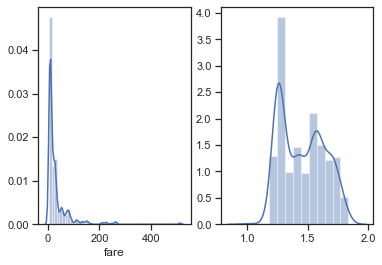

In [39]:
# transform training data & save lambda value
x = df.fare[df.fare > 0]
data,fitted_lambda = stats.boxcox(x)
fig, ax=plt.subplots(1,2)
sns.distplot(x, ax=ax[0])
sns.distplot(data, ax=ax[1])

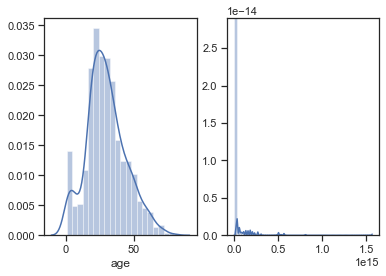

In [41]:
data,fitted_lambda = stats.boxcox(df.age)
fig, ax=plt.subplots(1,2)
sns.distplot(df.age, ax=ax[0])
sns.distplot(data, ax=ax[1])

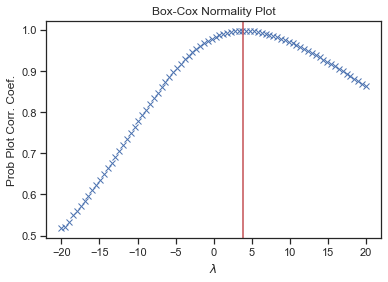

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.boxcox_normplot(x, -20, 20, plot=ax)

_, maxlog = stats.boxcox(x)
ax.axvline(maxlog, color='r')

# Pandas Apply function

In [45]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])

In [46]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [63]:
def test(x):
    return x**2

In [120]:
df.apply(test, axis=0)

,A,B
0,16,81
1,16,81
2,16,81


In [121]:
def test2(x):
    return sum(x)

In [122]:
df.apply(test2, axis=1)

0    13
1    13
2    13
dtype: int64

In [117]:
df.apply(lambda x: x**2)

,A,B
0,16,81
1,16,81
2,16,81


In [126]:
df.apply(lambda x: sum(x), axis=1)

0    13
1    13
2    13
dtype: int64

In [130]:
# Element wise 
df.applymap(lambda x : 2)

,A,B
0,2,2
1,2,2
2,2,2


In [131]:
df ** 2 # This is faster when applying scaler

,A,B
0,16,81
1,16,81
2,16,81


In [143]:
df.applymap(lambda x: 'A' if (x==4) else x**3)

,A,B
0,A,729
1,A,729
2,A,729
